# #3 Ito integral, Ito Lemma and its application



In [1]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

In [2]:
num_steps_per_year = 12 * 21 # 12 months times 21 business days
num_years = 1  # T (time horizon, see below), alternatively try 10, 20, 50, 100 etc.
num_simulation = 10000  # number of paths

In [3]:
# fair coins
u = np.random.uniform(0, 1, (num_simulation, int(num_steps_per_year * num_years)))
c = np.ones_like(u)
c[u < 0.5] = -1.  # setting tail=-1 (and head=1)
db = c / np.sqrt(num_steps_per_year)

$$
    db = \sum \frac{\pm 1}{\text{num steps per year}}
$$
in other words, $db$ describes the uptick or downtick of yesterday(sign is $+1$ or $-1$, respectively), per one stock

In [4]:
# Brownian motion
b = np.cumsum(db, axis=1)  # cumsum over columns(i.e. col 1, col 2, ...)
b = np.concatenate([np.zeros((num_simulation, 1)), b], axis=1)
# db = c / np.sqrt(num_steps_per_year)

In [5]:
# time
t = np.linspace(0, num_years, int(num_steps_per_year * num_years) + 1)
dt = t[1] - t[0]

$$
    \int_0^T B_t dB_t, \quad
    \int_0^T t B_t dB_t, \quad
    \int_0^T t^2 B_t dB_t, \quad
    \int_0^T t B_t^2 dB_t, \quad
    \int_0^T t e^{B_t} dB_t
$$

In [6]:
# integrand or betting
if 1:
    # B_t, regard this Brownian motion as a stock price
    betting = b[:, :-1]  # hence our (today's) betting(=stock_position) is based on the close price of the prior day (yesterday)
elif 0:
    # tB_t
    betting = t[:-1] * b[:, :-1]
elif 0:
    # t^2 B_t
    betting = (t[:-1]**2) * b[:, :-1]
elif 0:
    # tB_t^2
    betting = t[:-1] * (b[:, :-1] ** 2)
elif 0:
    # t e^{B_t}
    betting = t[:-1] * np.exp(b[:, :-1])

In [7]:
# Ito integral or totam cumulative P&L
ito = np.cumsum(betting * db, axis=1)
ito = np.concatenate([np.zeros((num_simulation, 1)), ito], axis=1)

'''
print(db)  # just for testing
print(b)
print(betting)
print(ito)
'''

'\nprint(db)  # just for testing\nprint(b)\nprint(betting)\nprint(ito)\n'

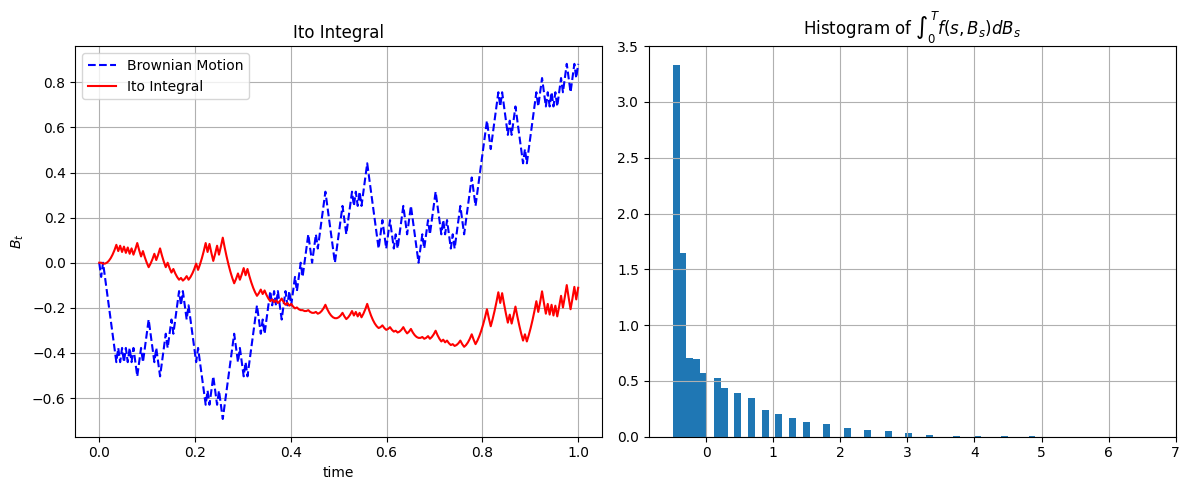

In [8]:
# B_t
# betting = b[:, :-1] <- the plot below shows this case

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12,5))

# plot of Brownian motions
ax.plot(t, b[0,:], '--b', label='Brownian Motion')
ax.plot(t, ito[0,:], 'r', label='Ito Integral')
ax.set_title('Ito Integral')
ax.set_xlabel('time')
ax.set_ylabel('$B_t$')
ax.grid(True)
ax.legend();

# histogram of S_10
ax2.hist(ito[:,-1], bins=70, density=True)
ax2.set_title('Histogram of $\int_0^T f(s, B_s) dB_s$')
ax2.grid(True)

plt.tight_layout()
plt.show()

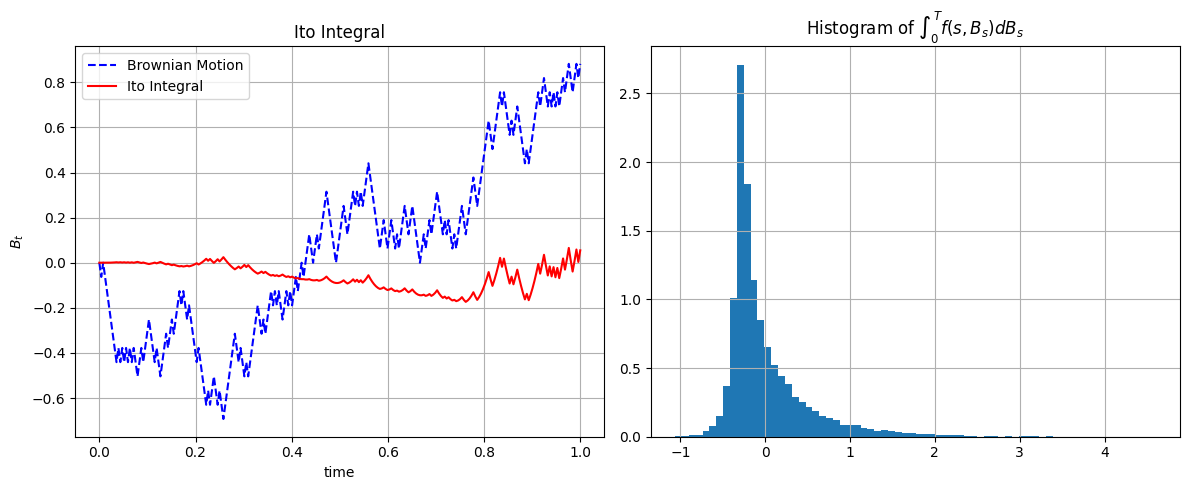

In [9]:
# tB_t
betting = t[:-1] * b[:, :-1]

ito = np.cumsum(betting * db, axis=1)
ito = np.concatenate([np.zeros((num_simulation, 1)), ito], axis=1)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12,5))

# plot of Brownian motions
ax.plot(t, b[0,:], '--b', label='Brownian Motion')
ax.plot(t, ito[0,:], 'r', label='Ito Integral')
ax.set_title('Ito Integral')
ax.set_xlabel('time')
ax.set_ylabel('$B_t$')
ax.grid(True)
ax.legend();

# histogram of S_10
ax2.hist(ito[:,-1], bins=70, density=True)
ax2.set_title('Histogram of $\int_0^T f(s, B_s) dB_s$')
ax2.grid(True)

plt.tight_layout()
plt.show()

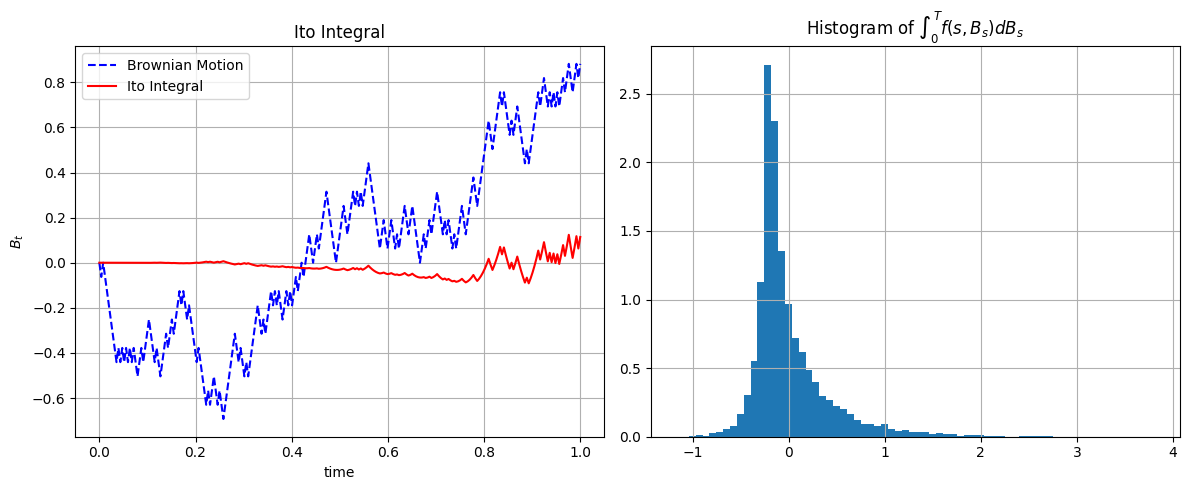

In [10]:
# t^2 B_t
betting = (t[:-1]**2) * b[:, :-1]

ito = np.cumsum(betting * db, axis=1)
ito = np.concatenate([np.zeros((num_simulation, 1)), ito], axis=1)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12,5))

# plot of Brownian motions
ax.plot(t, b[0,:], '--b', label='Brownian Motion')
ax.plot(t, ito[0,:], 'r', label='Ito Integral')
ax.set_title('Ito Integral')
ax.set_xlabel('time')
ax.set_ylabel('$B_t$')
ax.grid(True)
ax.legend();

# histogram of S_10
ax2.hist(ito[:,-1], bins=70, density=True)
ax2.set_title('Histogram of $\int_0^T f(s, B_s) dB_s$')
ax2.grid(True)

plt.tight_layout()
plt.show()

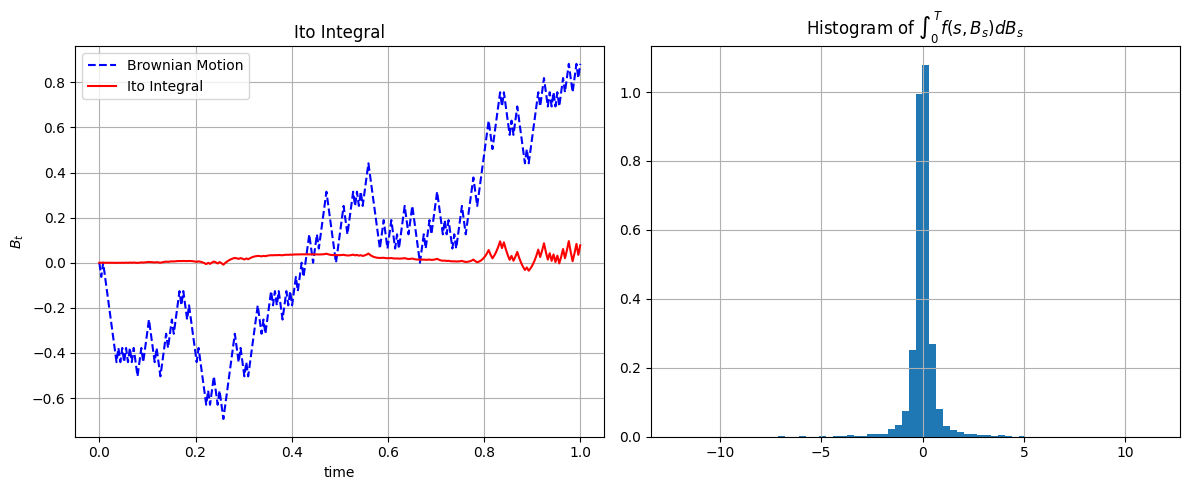

In [11]:
# tB_t^2
betting = t[:-1] * (b[:, :-1] ** 2)

ito = np.cumsum(betting * db, axis=1)
ito = np.concatenate([np.zeros((num_simulation, 1)), ito], axis=1)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12,5))

# plot of Brownian motions
ax.plot(t, b[0,:], '--b', label='Brownian Motion')
ax.plot(t, ito[0,:], 'r', label='Ito Integral')
ax.set_title('Ito Integral')
ax.set_xlabel('time')
ax.set_ylabel('$B_t$')
ax.grid(True)
ax.legend();

# histogram of S_10
ax2.hist(ito[:,-1], bins=70, density=True)
ax2.set_title('Histogram of $\int_0^T f(s, B_s) dB_s$')
ax2.grid(True)

plt.tight_layout()
plt.show()

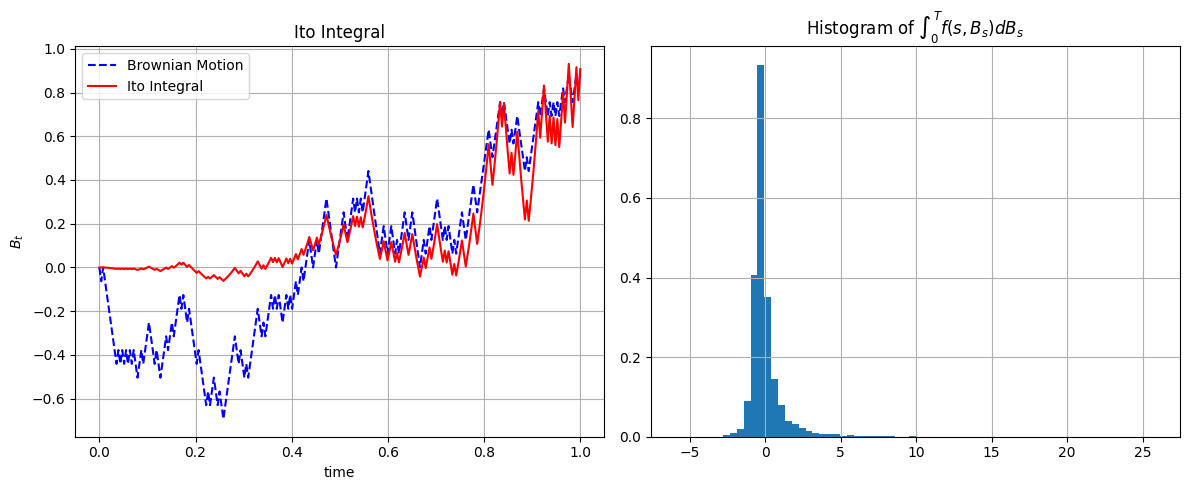

In [12]:
# t e^{B_t}
betting = t[:-1] * np.exp(b[:, :-1])

ito = np.cumsum(betting * db, axis=1)
ito = np.concatenate([np.zeros((num_simulation, 1)), ito], axis=1)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12,5))

# plot of Brownian motions
ax.plot(t, b[0,:], '--b', label='Brownian Motion')
ax.plot(t, ito[0,:], 'r', label='Ito Integral')
ax.set_title('Ito Integral')
ax.set_xlabel('time')
ax.set_ylabel('$B_t$')
ax.grid(True)
ax.legend();

# histogram of S_10
ax2.hist(ito[:,-1], bins=70, density=True)
ax2.set_title('Histogram of $\int_0^T f(s, B_s) dB_s$')
ax2.grid(True)

plt.tight_layout()
plt.show()

## #2 The case for non-Ito integral;

instead of $dB_s$, now we choose $dt$, the infinitesimal time interval - so this is just *ordinary integration* from Calculus course!

Here we plot the following non-Ito integrals;

$$
    \int_0^T B_t dt, \quad
    \int_0^T t B_t dt, \quad
    \int_0^T t^2 B_t dt, \quad
    \int_0^T t B_t^2 dt, \quad
    \int_0^T t e^{B_t} dt
$$ 

<br><br>


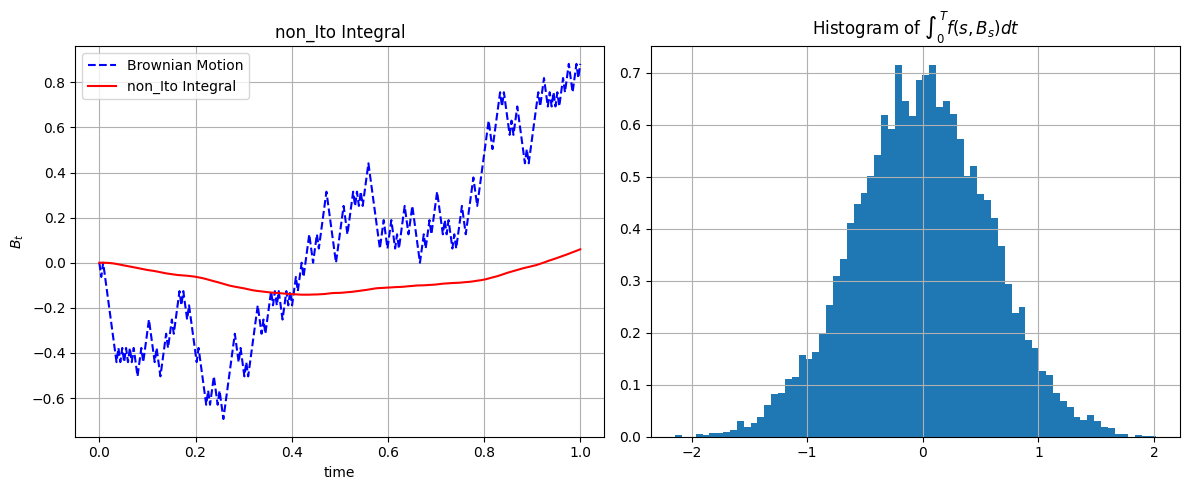

In [19]:
# B_t dt
betting = b[:, :-1]

non_ito = np.cumsum(betting * dt, axis=1)  # used dt, instead of db as was in the above Ito case & this part is the only difference (from the above Ito-case)
non_ito = np.concatenate([np.zeros((num_simulation, 1)), non_ito], axis=1)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12,5))

# plot of Brownian motions
ax.plot(t, b[0,:], '--b', label='Brownian Motion')
ax.plot(t, non_ito[0,:], 'r', label='non_Ito Integral')
ax.set_title('non_Ito Integral')
ax.set_xlabel('time')
ax.set_ylabel('$B_t$')
ax.grid(True)
ax.legend();

# histogram of S_10
ax2.hist(non_ito[:,-1], bins=70, density=True)
ax2.set_title('Histogram of $\int_0^T f(s, B_s) dt$')
ax2.grid(True)

plt.tight_layout()
plt.show()

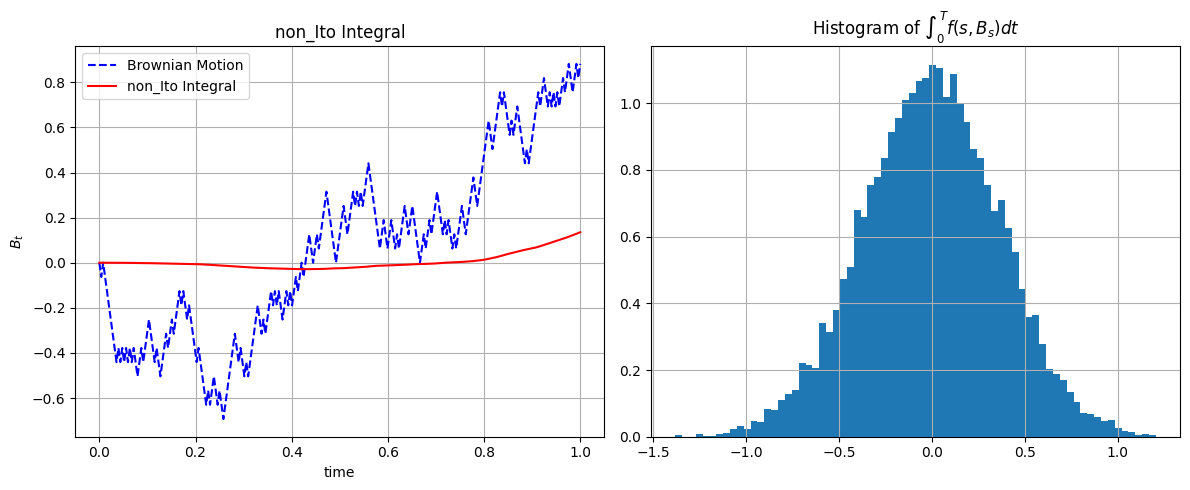

In [20]:
# t B_t dt
betting = t[:-1] * b[:, :-1]

non_ito = np.cumsum(betting * dt, axis=1)  # used dt, instead of db as was in the above Ito case
non_ito = np.concatenate([np.zeros((num_simulation, 1)), non_ito], axis=1)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12,5))

# plot of Brownian motions
ax.plot(t, b[0,:], '--b', label='Brownian Motion')
ax.plot(t, non_ito[0,:], 'r', label='non_Ito Integral')
ax.set_title('non_Ito Integral')
ax.set_xlabel('time')
ax.set_ylabel('$B_t$')
ax.grid(True)
ax.legend();

# histogram of S_10
ax2.hist(non_ito[:,-1], bins=70, density=True)
ax2.set_title('Histogram of $\int_0^T f(s, B_s) dt$')
ax2.grid(True)

plt.tight_layout()
plt.show()

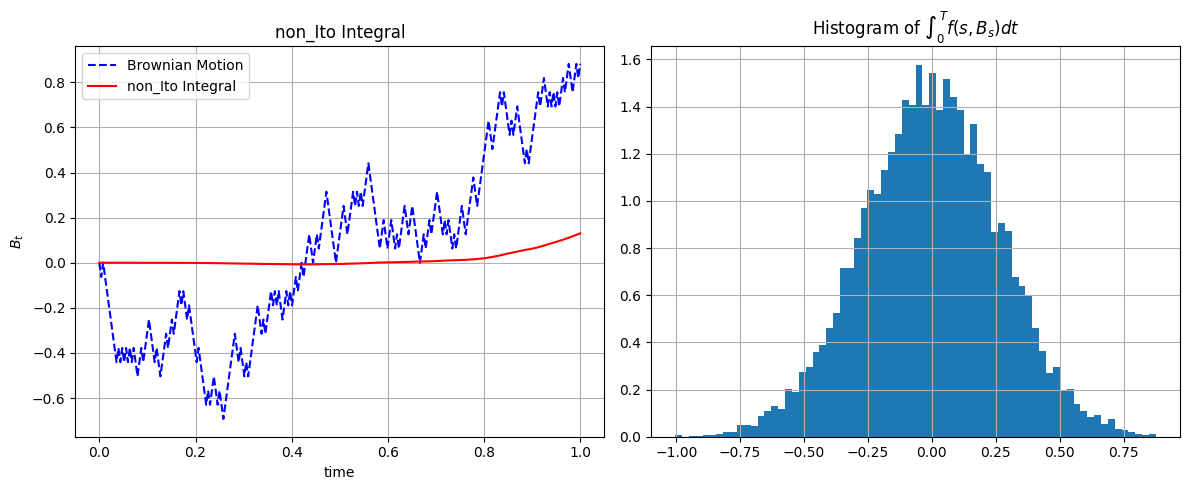

In [21]:
# t^2 B_t dt
betting = (t[:-1]**2) * b[:, :-1]

non_ito = np.cumsum(betting * dt, axis=1)  # used dt, instead of db as was in the above Ito case
non_ito = np.concatenate([np.zeros((num_simulation, 1)), non_ito], axis=1)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12,5))

# plot of Brownian motions
ax.plot(t, b[0,:], '--b', label='Brownian Motion')
ax.plot(t, non_ito[0,:], 'r', label='non_Ito Integral')
ax.set_title('non_Ito Integral')
ax.set_xlabel('time')
ax.set_ylabel('$B_t$')
ax.grid(True)
ax.legend();

# histogram of S_10
ax2.hist(non_ito[:,-1], bins=70, density=True)
ax2.set_title('Histogram of $\int_0^T f(s, B_s) dt$')
ax2.grid(True)

plt.tight_layout()
plt.show()

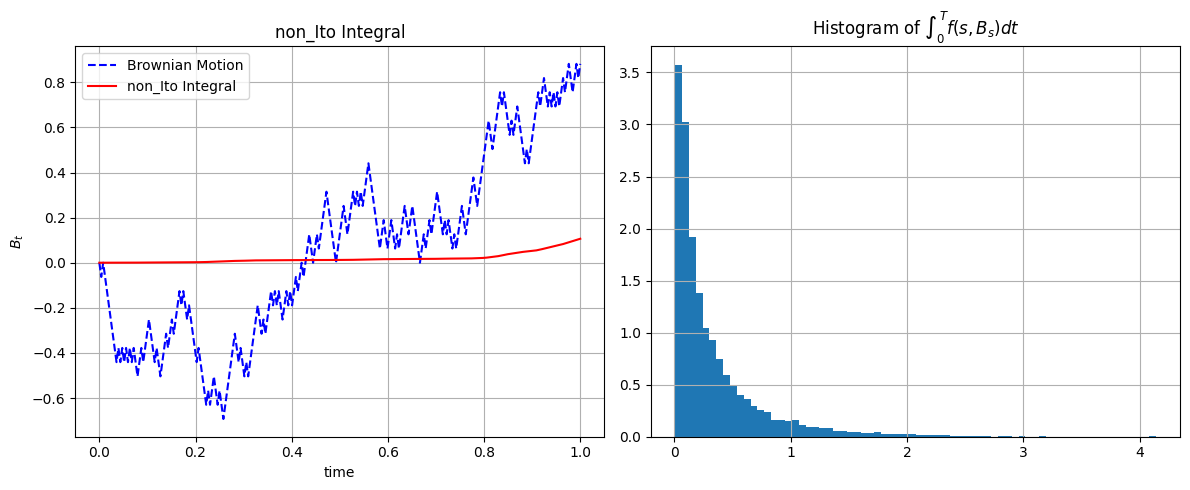

In [23]:
# t B_t^2 dt
betting = t[:-1] * (b[:, :-1]) ** 2

non_ito = np.cumsum(betting * dt, axis=1)  # used dt, instead of db as was in the above Ito case
non_ito = np.concatenate([np.zeros((num_simulation, 1)), non_ito], axis=1)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12,5))

# plot of Brownian motions
ax.plot(t, b[0,:], '--b', label='Brownian Motion')
ax.plot(t, non_ito[0,:], 'r', label='non_Ito Integral')
ax.set_title('non_Ito Integral')
ax.set_xlabel('time')
ax.set_ylabel('$B_t$')
ax.grid(True)
ax.legend();

# histogram of S_10
ax2.hist(non_ito[:,-1], bins=70, density=True)
ax2.set_title('Histogram of $\int_0^T f(s, B_s) dt$')
ax2.grid(True)

plt.tight_layout()
plt.show()

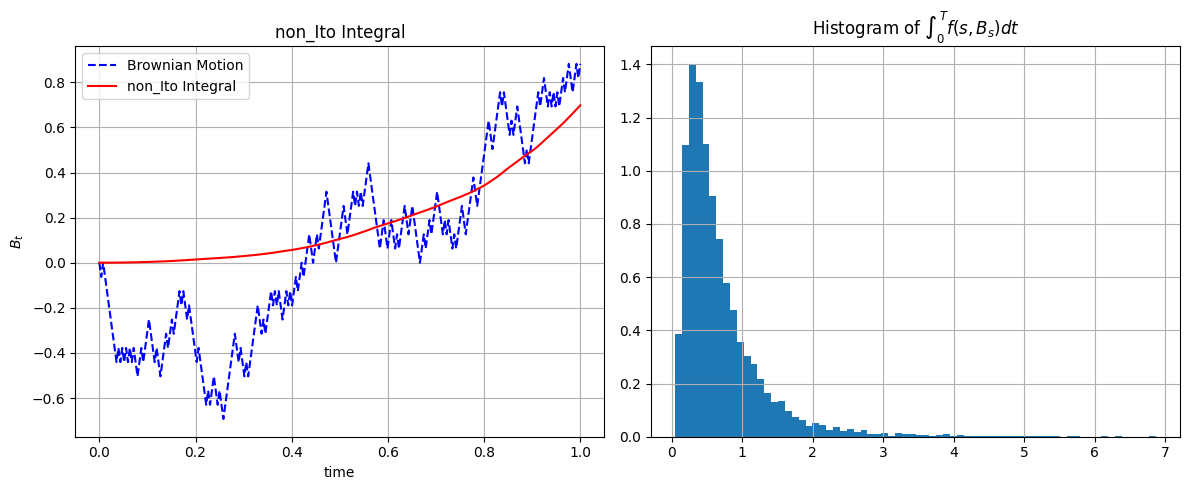

In [24]:
# t e^{B_t} dt
betting = t[:-1] * np.exp(b[:, :-1])

non_ito = np.cumsum(betting * dt, axis=1)  # used dt, instead of db as was in the above Ito case
non_ito = np.concatenate([np.zeros((num_simulation, 1)), non_ito], axis=1)

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12,5))

# plot of Brownian motions
ax.plot(t, b[0,:], '--b', label='Brownian Motion')
ax.plot(t, non_ito[0,:], 'r', label='non_Ito Integral')
ax.set_title('non_Ito Integral')
ax.set_xlabel('time')
ax.set_ylabel('$B_t$')
ax.grid(True)
ax.legend();

# histogram of S_10
ax2.hist(non_ito[:,-1], bins=70, density=True)
ax2.set_title('Histogram of $\int_0^T f(s, B_s) dt$')
ax2.grid(True)

plt.tight_layout()
plt.show()